In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [56]:
df=pd.read_csv('dataset_diabetes/diabetic_data.csv',na_values='?',low_memory=False)
df.head(15)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [48]:
print(df.encounter_id.nunique())
print(df.patient_nbr.nunique())
print(df.readmitted.unique())

101766
71518
['NO' '>30' '<30']


In [77]:
le = LabelEncoder()

df['readmitted'] = le.fit_transform(df.readmitted)   # 0 - <30, 1 - NO, 2 - >30
df['diabetesMed'] = le.fit_transform(df.diabetesMed)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [91]:
# Random Forest Regressor using entire dataset
inx = ['patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','diabetesMed','time_in_hospital'] + \
list(df.columns[12:18])
dfX = df.loc[:,inx]#zip_population2010']]
dfY = df.loc[:,'readmitted']
# for i in inx:
#     dfX[i] = scale(dfX.loc[:,i].astype(float))

dfX.head(2)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,8222157,6,25,1,0,1,41,0,1,0,0,0
1,55629189,1,1,7,1,3,59,0,18,0,0,0


In [80]:
df.columns[12:17]

Index(['num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency'],
      dtype='object')

In [92]:
lm = LinearRegression()
lm.fit(dfX,dfY)

pd.DataFrame({'features':dfX.columns,'coefficients':lm.coef_})

,coefficients,features
0,-8.813186e-10,patient_nbr
1,-7.997343e-04,admission_type_id
2,-1.229684e-03,discharge_disposition_id
3,-3.086282e-03,admission_source_id
4,-6.983580e-02,diabetesMed
5,-7.406635e-03,time_in_hospital
6,-4.465918e-04,num_lab_procedures
7,1.363047e-02,num_procedures
8,-1.810078e-03,num_medications
9,-1.872495e-02,number_outpatient


In [93]:
lm.score(dfX,dfY)

0.066567793438509826

In [94]:
rf = RandomForestRegressor(n_jobs=-1)
rf.n_estimators=100

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size=2./3)

rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rf.score(X_test,y_test)

0.055509745077373052

0.0430298146731
0.306839492373


0.21970926979541303

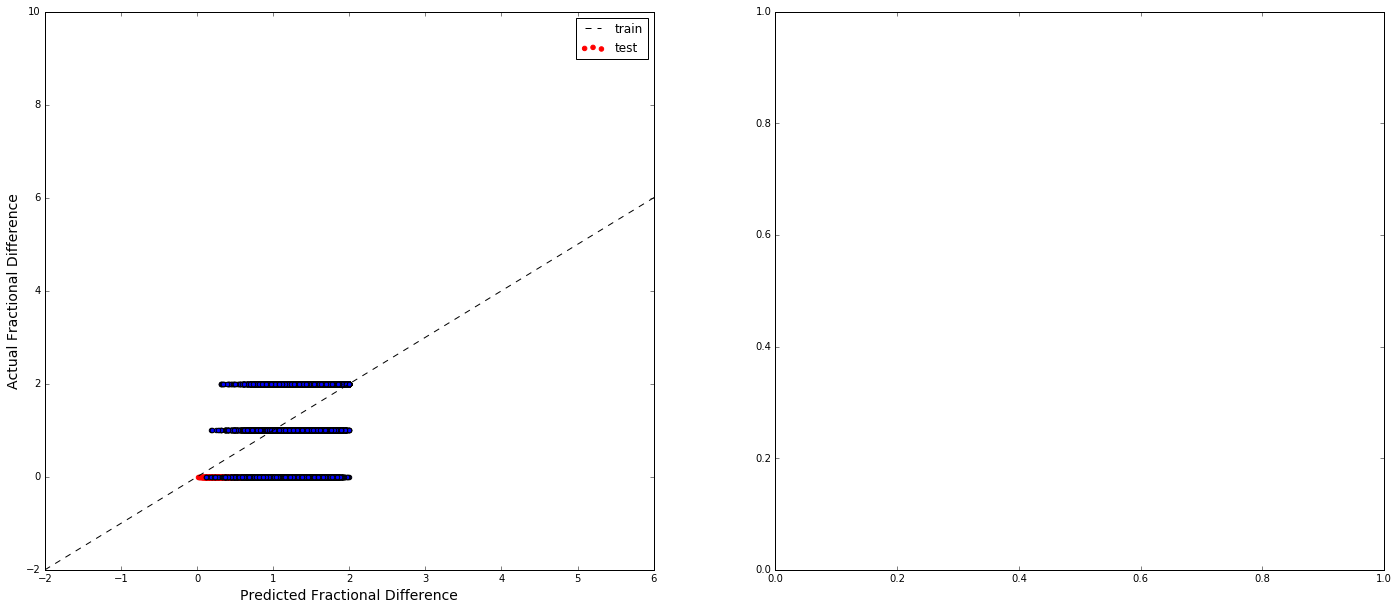

In [95]:
fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(24,10))

ax1.scatter(y_train_pred,y_train,color='r')
ax1.scatter(y_test_pred,y_test)
ax1.plot([-2,10],[-2,10],color='black',linestyle='--')
ax1.set_xlim([-2,6])
ax1.set_ylim([-2,10]);
ax1.legend(['train','test'])

ax1.set_xlabel('Predicted Fractional Difference',fontsize=14)
ax1.set_ylabel('Actual Fractional Difference',fontsize=14);

# ax2.scatter(X_train.lng,y_train_pred-y_train,color='r')
# ax2.scatter(X_test.lng,y_test_pred-y_test)

# ax2.legend(['train','test'])
# ax2.set_xlabel('Longitude',fontsize=14)
# ax2.set_ylabel('Residuals',fontsize=14);

print(mean_squared_error(y_train,y_train_pred)/y_train.mean())
print(mean_squared_error(y_test,y_test_pred)/y_test.mean())
mean_squared_error(y_test,y_test_pred)/(max(y_test) - min(y_train))

In [50]:
df_adtype = pd.read_csv('dataset_diabetes/IDs_mapping.csv',nrows=8, \
                        dtype={'admission_type_id':int})
df_adtype.head(3)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective


In [33]:
df_dischg = pd.read_csv('dataset_diabetes/IDs_mapping.csv',skiprows=10,nrows=30, \
                        dtype={'discharge_disposition_id':int})
df_dischg.head(3)

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF


In [34]:
df_adsrce = pd.read_csv('dataset_diabetes/IDs_mapping.csv',skiprows=42,nrows=25, \
                        dtype={'discharge_disposition_id':int})
df_adsrce.head(3)

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
